## Noise Analysis

In [1]:
# Importing libraries
import numpy as np # for mathematical functions and arrays
import matplotlib.pyplot as plt # for plotting
import random # to choose random numbers
from scipy.fft import fftfreq,rfft,irfft # for fast fourier transform and its tools

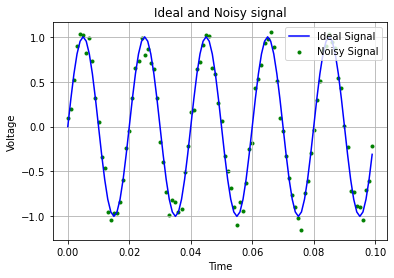

In [2]:
# Number of sample points
N = 100
# sample spacing
T = 1/1000
# Let's define random normal noise
mu=0
sigma=0.1
t=np.linspace(0,N*T,N,endpoint=False) # time array
V_noise=np.random.normal(mu,sigma,len(t))

V_without_noise=np.sin(50*2*np.pi*t) # signal without noise
# Noisy signal
V_with_noise=V_without_noise+V_noise
# Plotting and labelling
plt.plot(t,V_without_noise,label='Ideal Signal',color='blue')
plt.scatter(t,V_with_noise,label='Noisy Signal',color='green',marker='.')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Ideal and Noisy signal')
plt.legend(loc='upper right')
plt.grid()
plt.show()

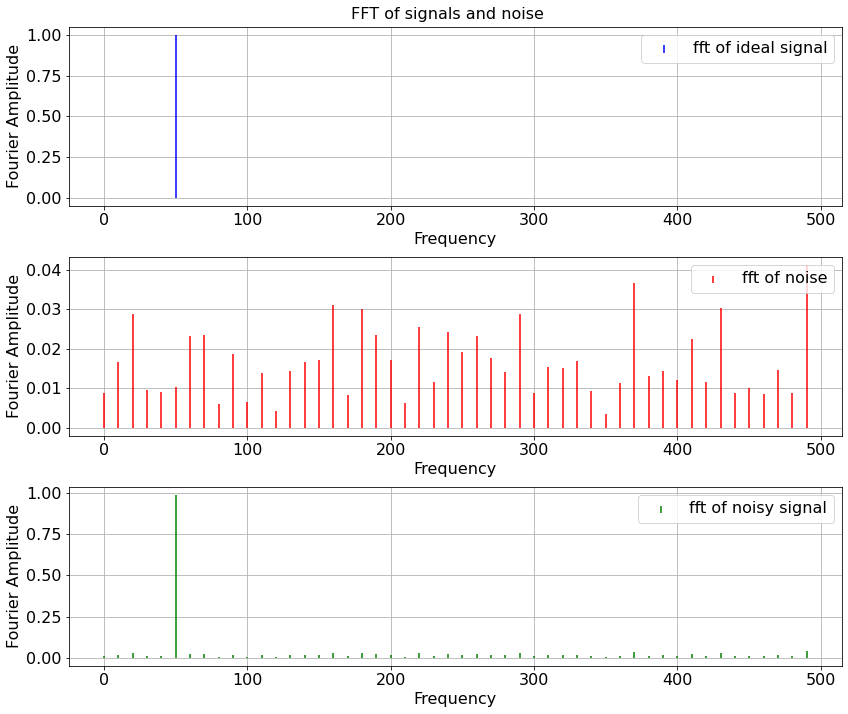

In [5]:
# Let's observe the signal in frequency domain by using fast fourier transform
f=fftfreq(N, T)[0:N//2] # Frequency
# Let's take fft of ideal signal,noise, noisy signal
Vf=rfft(V_without_noise)
nf=rfft(V_noise)
Vnf=rfft(V_with_noise)
# plotting and labelling the subplots
fig, ax = plt.subplots(3)
fig.set_size_inches(12,10) # size of figure
fig.tight_layout(pad=3) # spacing between subplots
plt.suptitle('FFT of signals and noise',fontsize=16)
ax[0].stem(f,2.0/N * np.abs(Vf[0:-1]),label='fft of ideal signal', markerfmt=" ",basefmt=" ",linefmt='blue')
ax[1].stem(f,2.0/N * np.abs(nf[0:-1]),label='fft of noise', markerfmt=" ",basefmt=" ",linefmt='red')
ax[2].stem(f,2.0/N * np.abs(Vnf[0:-1]),label='fft of noisy signal', markerfmt=" ",basefmt=" ",linefmt='green')
for i in range(3):
    ax[i].xaxis.set_tick_params(labelsize=16)
    ax[i].yaxis.set_tick_params(labelsize=16)
    ax[i].set_xlabel('Frequency',fontsize=16)
    ax[i].set_ylabel('Fourier Amplitude',fontsize=16)
    ax[i].legend(loc='upper right',fontsize=16)
    ax[i].grid()
plt.show()

#### In the above plot, it is visible that noise is present in entire frequency range but has low Fourier amplitude in frequency domain. We have selected the particular frequency region around the ideal signal frequency as shown below.

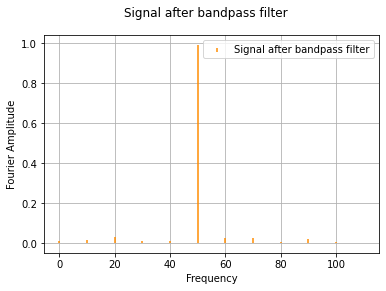

In [4]:
# Let's restrict our frequency to a particular range near the signal
# We will show that by doing so, noise will be reduced

f_l=0 # Lowest freq to pass
f_u=100 # Highest freq to pass
Vnf_bp=[] # creating empty arrays
for i in range(len(f)):
    if f_l<=abs(f[i])<=f_u:
        Vnf_bp.append(Vnf[i]) # Storing signal within the frequency band
    else:
        Vnf_bp.append(0)        
Vnf_bp=np.array(Vnf_bp)
# plotting and labelling
plt.suptitle('Signal after bandpass filter')
plt.stem(f[:N//8],2.0/N * np.abs(Vnf_bp[:N//8]),label='Signal after bandpass filter', markerfmt=" ",basefmt=" ",linefmt='darkorange')
plt.xlabel('Frequency')
plt.ylabel('Fourier Amplitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

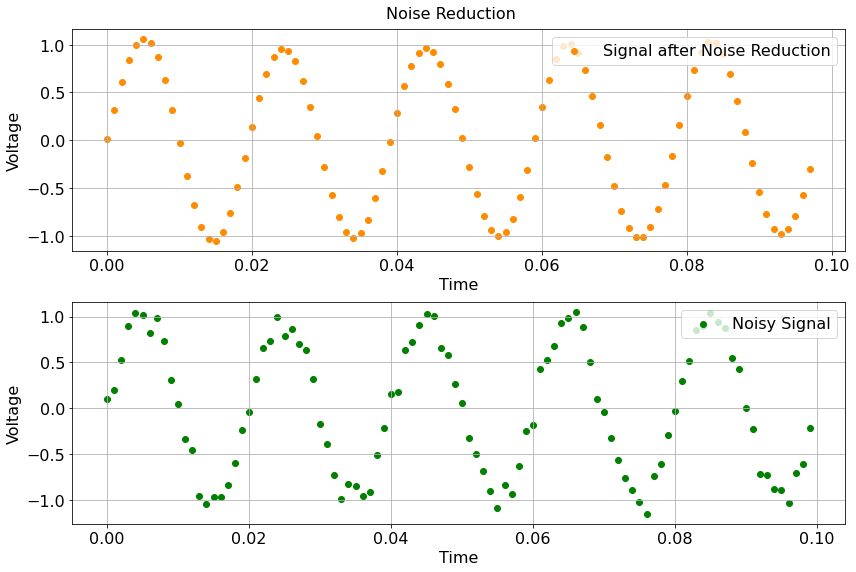

In [7]:
# Let's plot in time domain
Vn_bp=irfft(Vnf_bp) # inverse fft
#Plotting and labelling
fig, ax = plt.subplots(2)
fig.set_size_inches(12,8) # size of figure
fig.tight_layout(pad=3) # spacing between subplots
plt.suptitle('Noise Reduction',fontsize=16) # Super title
ax[0].scatter(t[:-2],Vn_bp,label='Signal after Noise Reduction',color='darkorange')
ax[1].scatter(t,V_with_noise,label='Noisy Signal',color='green')
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=16)
    ax[i].yaxis.set_tick_params(labelsize=16)
    ax[i].set_xlabel('Time',fontsize=16) # labelling axes
    ax[i].set_ylabel('Voltage',fontsize=16)
    ax[i].legend(loc='upper right',fontsize=16)
    ax[i].grid()
plt.show()

#### With the help of Fourier transform we have shown that by restricting our frequency range with the help of bandpass filters, we can easily minimise the noise in the signal.